## Predicting heart disease using machine learning

This notebook into using various python-based machine libraries in an attempt to bulid a machine learning model capable of predicting whether or not someone has heart diesase based on their medical attributes.

We're going to take the following approch:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition
In a statement,
>Given clinical patameters about a patient, can we predict whether or not they have heart diseaes?

## 2. Data

The original data came from the cleavland data from ML Repository There is also a version of its available : https://www.kaggle.com/datasets/johnsmith88/heart-disease-dataset

## 3. Evaluation

> If we can reach 95% accuract at predicting whethrer or not a patient has heart diseaese during the proof of concept we'll pursue the project

## 4.Features

**Create data dictionary**

1. age - age in year
2. sex - (1=male, 0=female)
3. cp - chest pain type (4 values)
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms(non heart related)
   * 3: Asymoptomatic: chest pain not showing sign of disease   
5. resting blood pressure
6. serum cholestoral in mg/dl
7. fasting blood sugar > 120 mg/dl
8. resting electrocardiographic results (values 0,1,2)
9. maximum heart rate achieved
10. exercise induced angina
11. oldpeak = ST depression induced by exercise relative to rest
12. the slope of the peak exercise ST segment
13. number of major vessels (0-3) colored by flourosopy
14. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect


-> The names and social security numbers of the patients were recently removed from the database, replaced with dummy values.

## Preparing the tools

We're going to use pandas, Matplotlib and Numpy for data analysis and manipulation

In [3]:
# Import all the tool we needs
# Regular EDA Exploratory data analysis and plotting libreary

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# we want our plot to appeat inside the notebook
%matplotlib inline

# Models from Scikit learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestRegressor

# Model Evalutions
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

## Load Data

In [5]:
df = pd.read_csv("heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
df.shape #(rows, columns)

(303, 14)

## Data Exploration (exploratory data analysis or EDA)

The goal here is to find out more about the data and become a subject matter export on the dataset you'are working with.

1. What quetions are you tring to solve?
2. What kind of data do we have and how do we treat diiferent types?
3. what's missing from the data and how do you deal with it?
4. Where are the outlier and why should you care about them?
5. How can you add, change or remove feature to get  more out of your data?

In [8]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [9]:
# Let's find out how many of each class there
df["target"].value_counts()

target
1    165
0    138
Name: count, dtype: int64

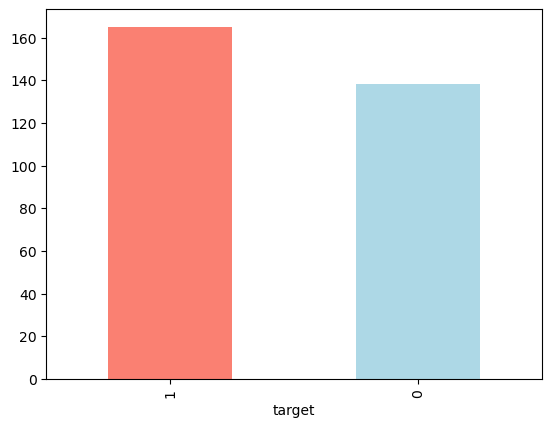

In [10]:
df["target"].value_counts().plot(kind="bar", color=["salmon", "lightblue"]);
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [12]:
# Are there any missing value?
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [14]:
### Heart Disease Frequency according to sex
df.sex.value_counts()

sex
1    207
0     96
Name: count, dtype: int64

In [15]:
## Compare target colum with sex column
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,24,114
1,72,93


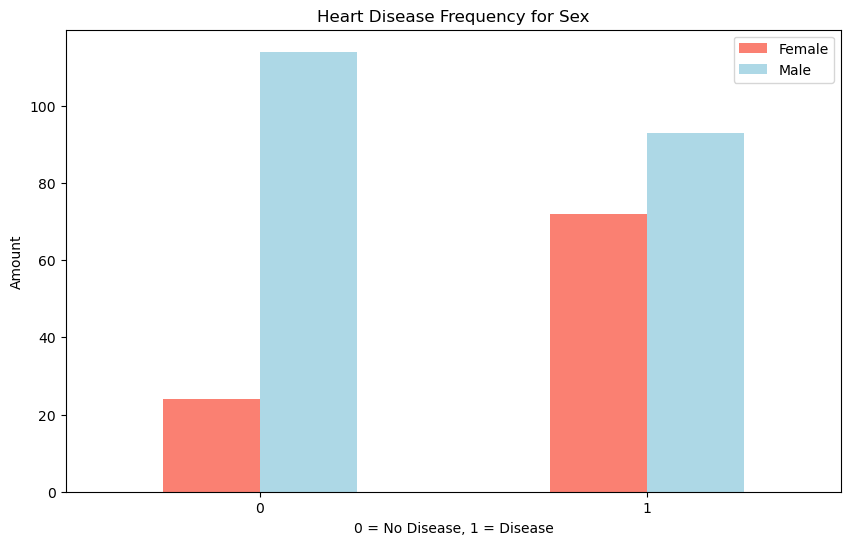

In [16]:
## Create a plot of crosstab
pd.crosstab(df.target, df.sex).plot(kind="bar",
                                    figsize=(10,6),
                                    color=["salmon", "lightblue"])

plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Amount")
plt.legend(["Female","Male"])
plt.xticks(rotation=0)
plt.show()

In [17]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [18]:
df["thalach"].value_counts()

thalach
162    11
160     9
163     9
152     8
173     8
       ..
202     1
184     1
121     1
192     1
90      1
Name: count, Length: 91, dtype: int64

## Age Vs Max Heart Rate for Heart Disease`

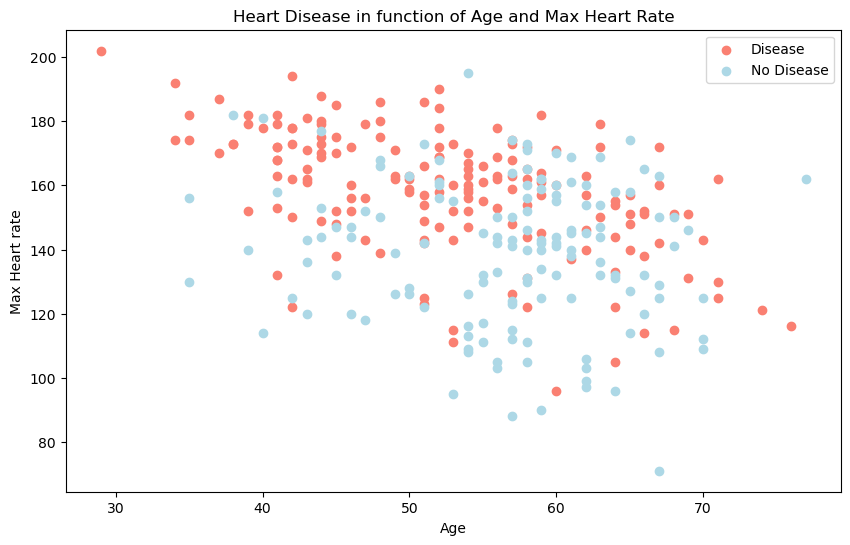

In [20]:
# Create another figure
plt.figure(figsize=(10,6))

# Scatter with positive example
plt.scatter(df.age[df.target == 1],
           df.thalach[df.target==1],
           c = "salmon")
plt.scatter(df.age[df.target == 0],
           df.thalach[df.target==0],
           c = "lightblue");
plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age") 
plt.ylabel("Max Heart rate")
plt.legend(["Disease", "No Disease"])
plt.show()

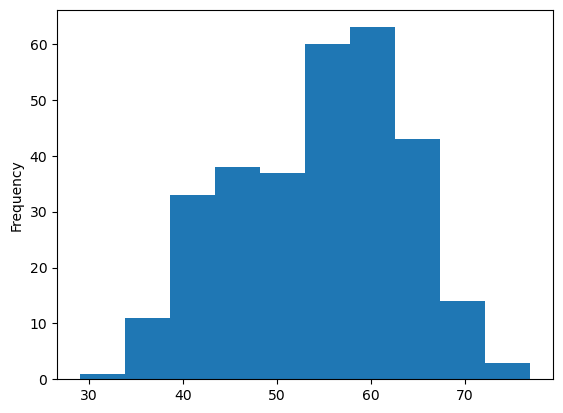

In [21]:
# Check the distribution of the age colunms with age columns
df.age.plot.hist();
plt.show()

### Heart Disease Frequency per chest pain type

cp - chest pain type (4 values)
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms(non heart related)
   * 3: Asymoptomatic: chest pain not showing sign of disease  

In [23]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


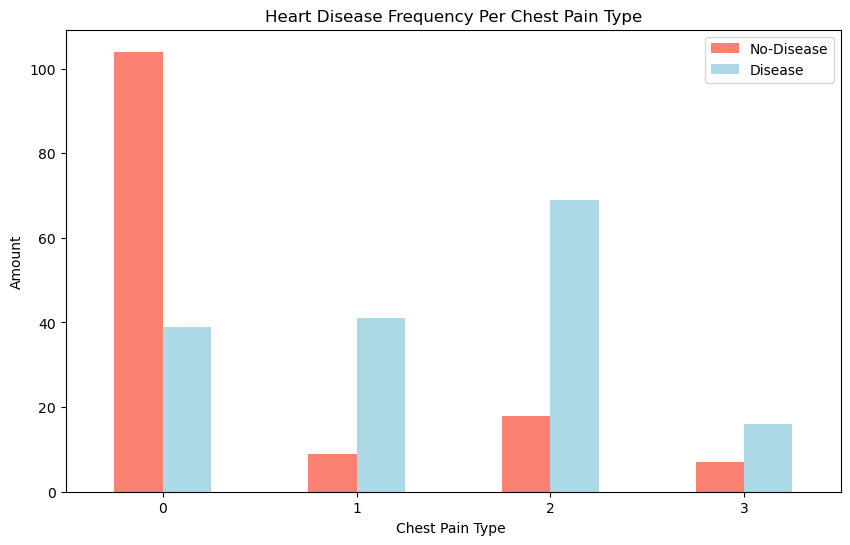

In [24]:
## Make the crosstab more visual
pd.crosstab(df.cp, df.target).plot(kind="bar",
                                  figsize=(10,6),
                                  color=["salmon", "lightblue"])
## Add some communication
plt.title("Heart Disease Frequency Per Chest Pain Type")
plt.xlabel("Chest Pain Type ")
plt.ylabel("Amount")
plt.legend(["No-Disease","Disease"])
plt.xticks(rotation=0)
plt.show()

In [25]:
# Make a correlation matrix
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


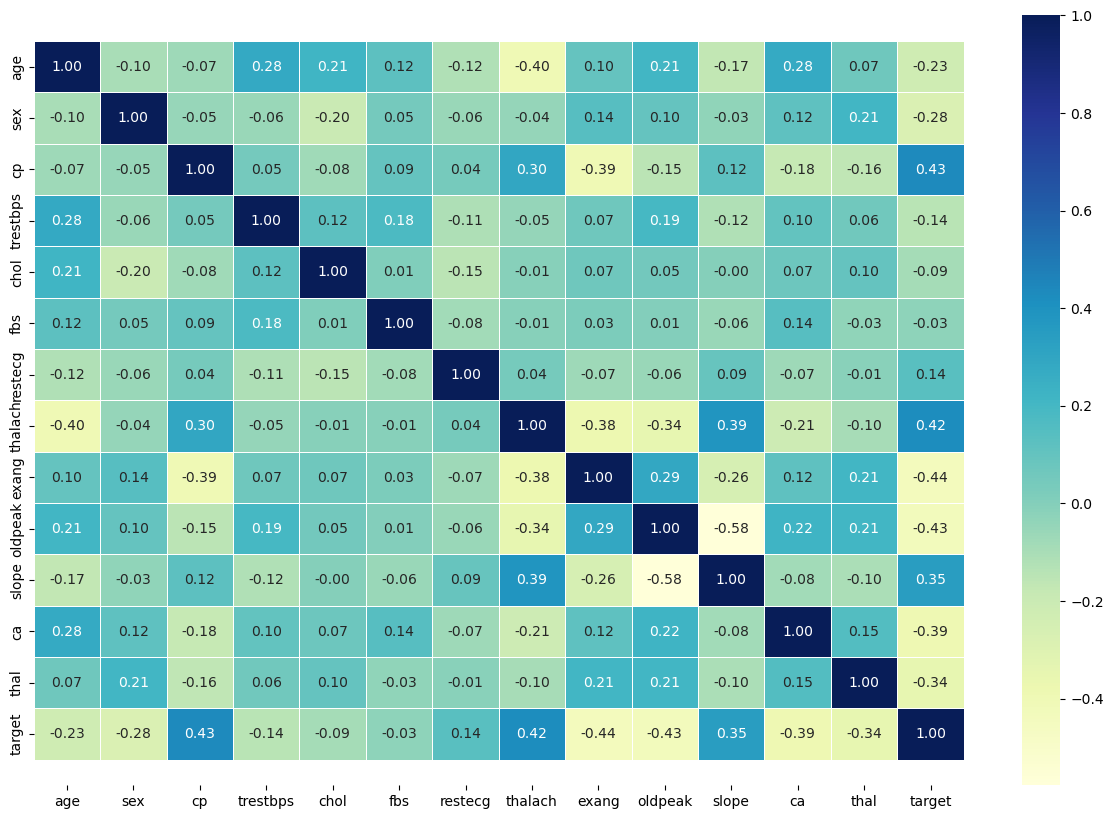

In [26]:
# Let make our correlation matrix a little prettier
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15,10))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="YlGnBu")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top-0.5)
plt.show()

## 5. Modelling

In [28]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1


In [29]:
## Spliting data into x and y
x = df.drop("target", axis=1)
y = df["target"]

In [30]:
x,y

(     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
 0     63    1   3       145   233    1        0      150      0      2.3   
 1     37    1   2       130   250    0        1      187      0      3.5   
 2     41    0   1       130   204    0        0      172      0      1.4   
 3     56    1   1       120   236    0        1      178      0      0.8   
 4     57    0   0       120   354    0        1      163      1      0.6   
 ..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
 298   57    0   0       140   241    0        1      123      1      0.2   
 299   45    1   3       110   264    0        1      132      0      1.2   
 300   68    1   0       144   193    1        1      141      0      3.4   
 301   57    1   0       130   131    0        1      115      1      1.2   
 302   57    0   1       130   236    0        0      174      0      0.0   
 
      slope  ca  thal  
 0        0   0     1  
 1        0   0     2  
 2

In [31]:
# split data into train and test sets
np.random.seed(42)

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.2)


In [32]:
x_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
132,42,1,1,120,295,0,1,162,0,0.0,2,0,2
202,58,1,0,150,270,0,0,111,1,0.8,2,0,3
196,46,1,2,150,231,0,1,147,0,3.6,1,0,2
75,55,0,1,135,250,0,0,161,0,1.4,1,0,2
176,60,1,0,117,230,1,1,160,1,1.4,2,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3
71,51,1,2,94,227,0,1,154,1,0.0,2,1,3
106,69,1,3,160,234,1,0,131,0,0.1,1,1,2
270,46,1,0,120,249,0,0,144,0,0.8,2,0,3


In [33]:
y_train

132    1
202    0
196    0
75     1
176    0
      ..
188    0
71     1
106    1
270    0
102    1
Name: target, Length: 242, dtype: int64

Now we've got out data split into training and test sets, it's time to build ML model

We'll trian it (find the patterns) on the training set
And we'll test it(use the patterns) on the test set.

We're going to try 3 different machine 
1. Logistic Regressiom
2. K-Nearest Negighbours Classifer
3. Random Forest Classifier

In [35]:
# Put models in a dictionary
models = {"LogisticRegression" : LogisticRegression(),
          "KNN" : KNeighborsClassifier(),
          "Random Forest" : RandomForestRegressor()}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test,y_train, y_test):
    """
    Fits and evaluates given machine learning models.
    models: a dict of different Scikit-Learn machine learning models
    x_train: train data (nolabels)
    x_test: testing data (no labels)
    y_train: training labels
    y_test: test labels
    """
    #set random seeds
    np.random.seed(42)
    
    # Make dict to keep model scores
    model_scorees ={}

    #loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train,y_train)
        # Evaluate the model and append its score to model scores
        model_scorees[name] = model.score(x_test, y_test)
    return model_scorees

In [36]:
model_scores = fit_and_score(models = models,
                             x_train = x_train,
                             x_test=x_test,
                             y_train=y_train,
                             y_test=y_test)
model_scores

C:\Users\Manshay\heart-disease\env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.5300502155172415}

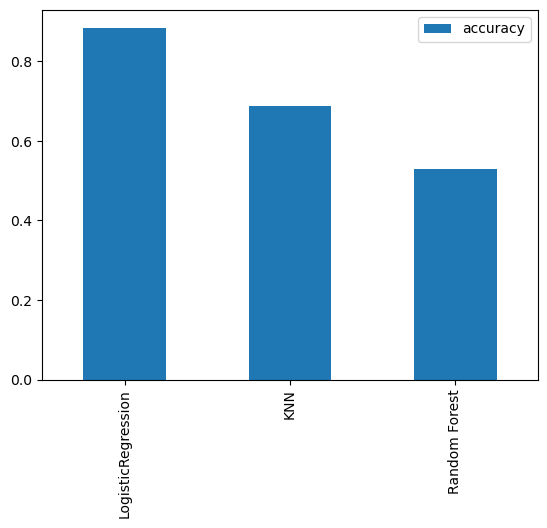

In [37]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar();          
plt.show()

Now we've got baseline model.. and we know a model's fist prediction aren't alwas what we should based our next steps off. what shou;d do?

Let's look at the following:
* Hyperparameter tuning (ALL)
* Feature Importance (ALL)
* Confusion Matrix
* Cross-Validation
* Precision
* Recall
* F1 Score
* Classification
* ROC Curve
* Area under the curve (AUC)

### Hyperparameter tuning

In [39]:
# Let's tune KNN
train_scores = []
test_scores = []

# Create a list of different values for n_neigbours
neighnours = range(1,21)

# Setup KNN instance
knn = KNeighborsClassifier()

# Loop through different n_neigbhours
for i in neighnours:
    knn.set_params(n_neighbors=i)

    # fit the algo
    knn.fit(x_train, y_train)

    # update the train score list
    train_scores.append(knn.score(x_train,y_train))

    #update the test score list
    test_scores.append(knn.score(x_test, y_test))

In [40]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [41]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

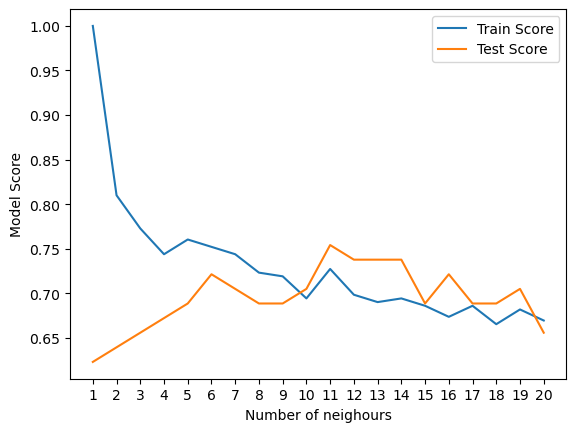

Maximum KNN score on the the test data: 75.409836%


In [42]:
plt.plot(neighnours, train_scores, label="Train Score")
plt.plot(neighnours, test_scores, label="Test Score")
plt.xticks(np.arange(1,21,1))
plt.xlabel("Number of neighours")
plt.ylabel("Model Score")
plt.legend()
plt.show()
print(f"Maximum KNN score on the the test data: {max(test_scores)*100:2f}%")

## Hyperparameter tuning with RandomizedSearchCV 

We're going to tune:
* LogiticRegression()
* RandomForestClassifier()

.. using RandomizedSearchCV

In [44]:
# Create a hyperparameter grid for logisitic reression 
log_reg_grid = {"C":np.logspace(-4, 4,20),
               "solver":["liblinear"]}

# create a hyperpareameter grid for RandomForesetClassifier
rf_grid = {"n_estimators":np.arange(10,1000,50),
          "max_depth":[None,3,5,10],
          "min_samples_split":np.arange(2,20,2),
          "min_samples_leaf":np.arange(1,20,2)}

Now we've got huyperparameter grid setup each of our models, let tune them using
RandomizedSearchCV..

In [46]:
# Tune LogisticRegression MOdel
np.random.seed(42)

# setup random hyperparameter search for logisticRefression
rs_log_ref = RandomizedSearchCV(LogisticRegression(),
                                param_distributions=log_reg_grid,
                                cv=5,
                                n_iter=20,
                                verbose=True)

# Fir random hyperparameter search  model for LOgestic regression
rs_log_ref.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [47]:
rs_log_ref.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [48]:
rs_log_ref.score(x_test,y_test)

0.8852459016393442

Now we've tuned LogisticRegression(), let do the same for RandomForestClassifier()

In [50]:
# Setup random seed
np.random.seed(42)

# setup random hyperparameter search for Randomforest Classifier
rs_rf = RandomizedSearchCV(RandomForestRegressor(),
                           param_distributions=rf_grid,
                           cv=5,
                           n_iter=20,
                          verbose=True)

#fir random hyperparameter search model for RandomForestClassifier()
rs_rf.fit(x_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [51]:
# find the best hyperparameters
rs_rf.best_params_

{'n_estimators': 10,
 'min_samples_split': 16,
 'min_samples_leaf': 9,
 'max_depth': None}

In [52]:
# Evalute the randomized search randomForestCLassifier model
rs_rf.score(x_test,y_test)

0.5727173648504287

In [53]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.5300502155172415}

1. by  Hand
2. RandomizedSearchCV
3. GridSearchCV

## Hyperparameter tuning with GridSearchCV
since our logisticRegression model provides the best  score so, far we'll try and imporve them again using gridsearchcv

In [56]:
# Different hyperparameters for out logistic regression
log_reg_grid = {"C":np.logspace(-4,4,30),
                "solver":["liblinear"]}

# setup Grid hyperparameter search for logisticRegression
gs_log_reg = GridSearchCV(LogisticRegression(),
                          param_grid=log_reg_grid,
                          cv=5,
                          verbose=True)

# Fit Grid hyperparameter search model
gs_log_reg.fit(x_train, y_train);

Fitting 5 folds for each of 30 candidates, totalling 150 fits


In [57]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [58]:
# Evaluate the grid search LogisticRegression model
gs_log_reg.score(x_test, y_test)

0.8852459016393442

In [59]:
model_scores

{'LogisticRegression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.5300502155172415}

## Evaluting our tuned machine learning classifier, beyond accuracy
* ROC curve and AUC score
* Confusion matrix
* Classification report
* recall
* F1-score

  ... and it would be great if cross-validation was used where possible

  To make comparision and evalute our trained model, firest  we need to make prediction

In [61]:
y_preds = gs_log_reg.predict(x_test)

In [62]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [63]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

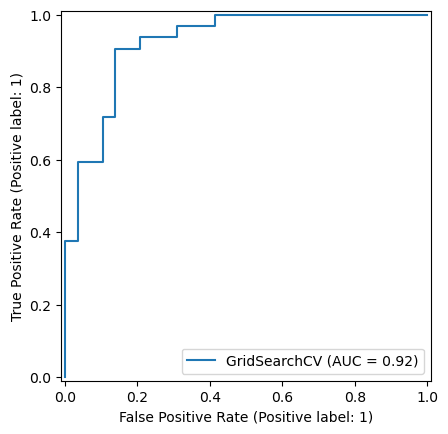

In [64]:
# plot ROC curve and calcualte and calculate AUC metric
RocCurveDisplay.from_estimator(gs_log_reg, x_test, y_test)
plt.show()

In [65]:
# Confusion matrix
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


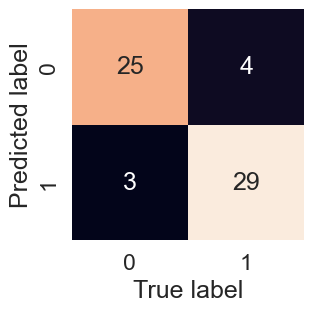

In [66]:
sns.set(font_scale=1.5)
def plot_conf_mat(y_test, y_preds):
    """
    Plots a nice looking confusion matrix using Seaborn's heatmap()
    """
    fig,ax = plt.subplots(figsize=(3,3))
    ax = sns.heatmap(confusion_matrix(y_test, y_preds),
                     annot=True,
                     cbar=False)
    plt.xlabel("True label")
    plt.ylabel("Predicted label")

    # bottom, top = ax.get_ylim()
    # ax.set_ylim(bottom + 0.5, top -0.5)
    plt.show()
    
plot_conf_mat(y_test, y_preds)

Now we'he got a ROC curve, an AUC metric, let's get classificatio report as well cross- validation precision  and recall fscore

print( classification_report(y_test, y_preds))

In [69]:
y_test.sum()

32

### calculate evalution metrics using cross validation
we're going to calculate precision, recall and f1-score of our model using cross-validation and to do we'll be using `cross_val_score()`

In [71]:
# Check best hyperparameters
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [72]:
# Create a new classifier with best parameters
clf = LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

In [73]:
## Cross-validation accuracy 
cv_acc = cross_val_score(clf,
                         x,
                         y,
                         cv=5,
                         scoring="accuracy")
cv_acc                         

array([0.81967213, 0.90163934, 0.8852459 , 0.88333333, 0.75      ])

In [74]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8479781420765027

In [75]:
## Cross-validation Prescision
cv_precision = cross_val_score(clf,
                               x,
                               y,
                               cv=5,
                               scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision

0.8215873015873015

In [76]:
## Cross-validation recall
## Cross-validation Prescision
cv_recall = cross_val_score(clf,
                               x,
                               y,
                               cv=5,
                               scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall

0.9272727272727274

In [77]:
## Cross-validation f1 score
## Cross-validation Prescision
cv_f1 = cross_val_score(clf,
                               x,
                               y,
                               cv=5,
                               scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1

0.8705403543192143

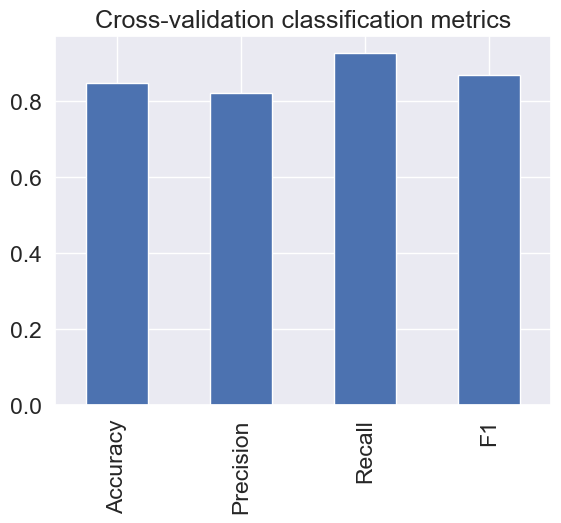

In [78]:
## Visualize cross-validation metrics 
cv_metrics = pd.DataFrame({"Accuracy":cv_acc,
                           "Precision":cv_precision,
                           "Recall":cv_recall,
                           "F1":cv_f1},
                          index=[0])
cv_metrics.T.plot.bar(title="Cross-validation classification metrics",
                      legend=False)
plt.show()

### Feature importance 

Feature importance is another as asking "where feature contributed most to the outcomes of the model and how did they contribute?

Finding feature importance is different for each machine learning models

Let's find the feature importance for our logistic regresion
model..

In [80]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [81]:
# Fit an instance of Logisitc regression
gs_log_reg.best_params_

clf=LogisticRegression(C=0.20433597178569418,
                        solver='liblinear')

clf.fit(x_train, y_train);

In [82]:
# Check coef_
clf.coef_

array([[ 0.00320769, -0.86062047,  0.66001431, -0.01155971, -0.00166496,
         0.04017239,  0.31603402,  0.02458922, -0.6047017 , -0.56795457,
         0.45085391, -0.63733326, -0.6755509 ]])

In [83]:
# Match coef's of features to columns 
feature_dict = dict(zip(df.columns,list(clf.coef_[0])))
feature_dict

{'age': 0.0032076873709286024,
 'sex': -0.8606204735539111,
 'cp': 0.6600143086174385,
 'trestbps': -0.01155970641957489,
 'chol': -0.0016649609500147373,
 'fbs': 0.04017238940156104,
 'restecg': 0.3160340177157746,
 'thalach': 0.02458922261936637,
 'exang': -0.6047017032281077,
 'oldpeak': -0.567954572983317,
 'slope': 0.4508539117301764,
 'ca': -0.6373332602422034,
 'thal': -0.6755508982355707}

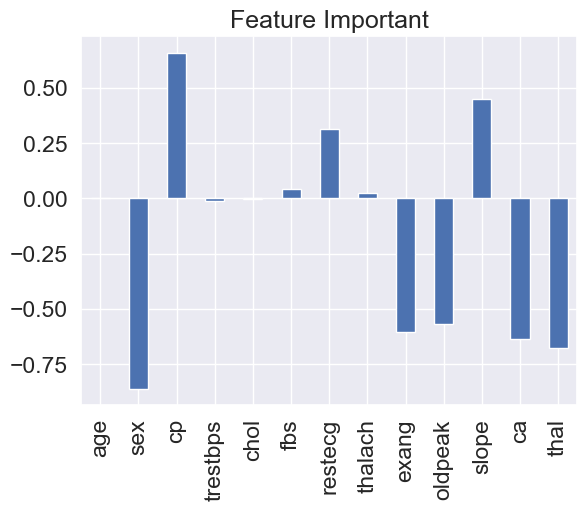

In [84]:
# Visulize feature importance 
feature_df = pd.DataFrame(feature_dict,index=[0])
feature_df.T.plot.bar(title="Feature Important",legend=False)
plt.show()

# 6. Experitation
If you haven't hit evalution metric yet... ask yourself...

* Could you collect more data?
* Could you try a better model? Like Catboost or XG boost?
* Could you imporve the current models? (beyond what we've done?
* If your model is good enough (you have hit ypur evalution metric) how would you export it and share it with other?